In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [54]:
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x = train.drop(['label'],axis=1)
y = train['label']

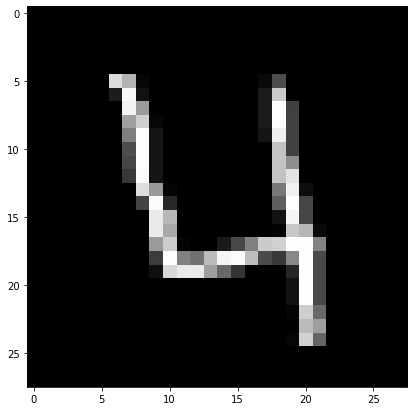

4


In [5]:
plt.figure(figsize = (7,7))
idx = 3

grid_data = x.iloc[idx].to_numpy().reshape(28,28)
plt.imshow(grid_data, interpolation = 'none', cmap = 'gray')
plt.show()

print(y[idx])

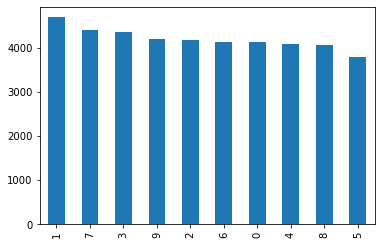

In [6]:
y.value_counts().plot(kind="bar")
plt.show()

From the plot we can conclude that the data is balanced

Lets us analyse the data by using dimensionality reduction techniques such as PCA and t-SNE

In [7]:
labels = y.head(15000)
data = x.head(15000)

In [8]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [9]:
sample_data = standardized_data

In [10]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)
pca_data.shape

(15000, 2)

In [11]:
pca_data = np.vstack((pca_data.T, labels)).T
dataframe = pd.DataFrame(data=pca_data, columns=('1st_principal', '2nd_principal', 'label'))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.043624      -5.558850    1.0
1      19.305268       6.193401    0.0
2      -7.678731      -1.909828    1.0
3      -0.464849       5.525783    4.0
4      26.644275       6.366374    0.0


F:\python\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


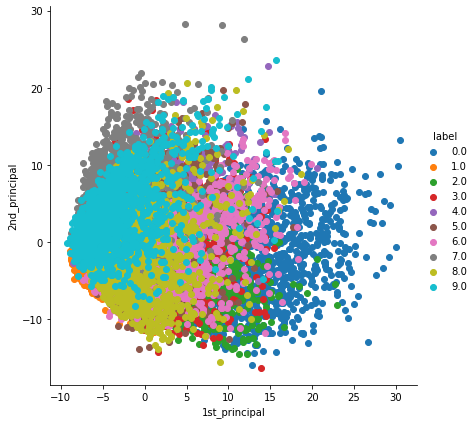

In [12]:
sns.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [13]:
from sklearn.manifold import TSNE

In [14]:
data_1000 = x.iloc[0:10000,:]
labels_1000 = y.iloc[0:10000]

In [15]:
data_1000

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
model = TSNE(n_components=2, random_state=0,perplexity = 40)

In [17]:
tsne_data = model.fit_transform(data_1000)
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=('Dim_1', 'Dim_2', 'label'))

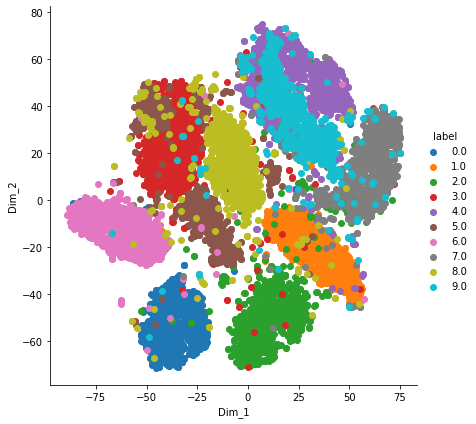

In [18]:
sns.FacetGrid(tsne_df, hue='label', height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

Here we can observe that the separation between the clusters is fair enough and we can use the accuracy score as a parameter
for evaluation of the model

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
model = LogisticRegression(tol=0.1,solver = 'lbfgs')

In [61]:
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size = 0.05,random_state= 42)

In [62]:
model.fit(x,y)

F:\python\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [63]:
y_pred = model.predict(x_val)

In [64]:
y_prediction = model.predict(test)

In [65]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [66]:
print(classification_report(y_val,y_pred))
print(accuracy_score(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       216
           1       0.98      0.97      0.97       234
           2       0.95      0.94      0.94       222
           3       0.94      0.93      0.93       260
           4       0.95      0.95      0.95       196
           5       0.90      0.88      0.89       160
           6       0.96      0.96      0.96       199
           7       0.96      0.94      0.95       230
           8       0.88      0.92      0.90       191
           9       0.90      0.92      0.91       192

    accuracy                           0.94      2100
   macro avg       0.94      0.94      0.94      2100
weighted avg       0.94      0.94      0.94      2100

0.9414285714285714
